## Script is designed to compare GTDB and NCBI taxa

Input is: <br>

1. File "Tax_gtdb.csv" <br>
2. File "Tax_gtdb-ncbi_v2.csv" <br>
The files was made with "Gtdb_tax_ncbi_names.ipynb" script: <br>

Output is: <br>
Vienn diagram

In [1]:
# import packages
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import pandas as pd
import numpy as np

## Read files

In [6]:
rel='214'
gtdbAll = pd.read_excel('/Users/katerynapantiukh/Documents/1MyDisk/Code/Microbiome/NCBI_vs_GTDB/results/GTDB_all_species.xlsx')
gtdbN = pd.read_excel('/Users/katerynapantiukh/Documents/1MyDisk/Code/Microbiome/NCBI_vs_GTDB/results/Tax_gtdb-ncbi_v'+str(rel)+'.xlsx')
gtdbN.head(2)

,domain,phylum,class,order,family,genus,sp,sp_gtdb,sp_ncbi
0,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas_E,Pseudomonas_E mandelii_C,Pseudomonas_E mandelii_C,"(g__) 25.0%, Pseudomonas mandelii 25.0%, Pseud..."
1,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Neisseriaceae,Neisseria,Neisseria sp000186165,Neisseria sp000186165,"(g__) 30.3%, Neisseria subflava 18.18%, Neisse..."


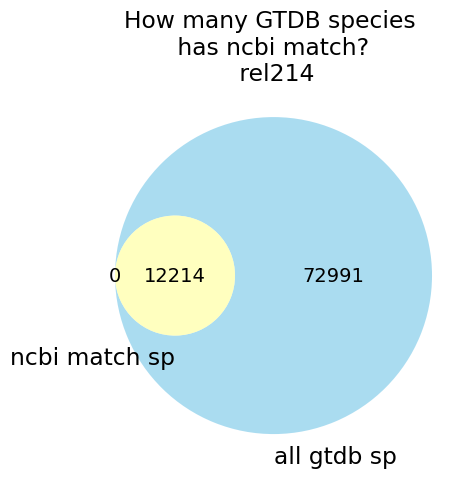

In [8]:
from matplotlib.pyplot import figure
figure(figsize=(5, 5), dpi=100)
plt.rcParams.update({'font.size': 14})

venn2([set(gtdbN['sp_gtdb'].to_list()), 
       set(gtdbAll['sp'].to_list())],
       set_labels=('ncbi match sp', 'all gtdb sp'), 
       set_colors=('orange', 'skyblue'), alpha = 0.7)

plt.title('How many GTDB species \n has ncbi match? \n rel'+str(rel))
plt.tight_layout()
plt.savefig('results/gtdb_nacbi_matches.png')

In [9]:
gtdbC = gtdbN
gtdbC['comp'] = np.where(gtdbC['sp_gtdb'] != gtdbC['sp_ncbi'], 'different sp name', 'same sp name')
gtdbC['comp'].value_counts()

different sp name    12175
same sp name            39
Name: comp, dtype: int64

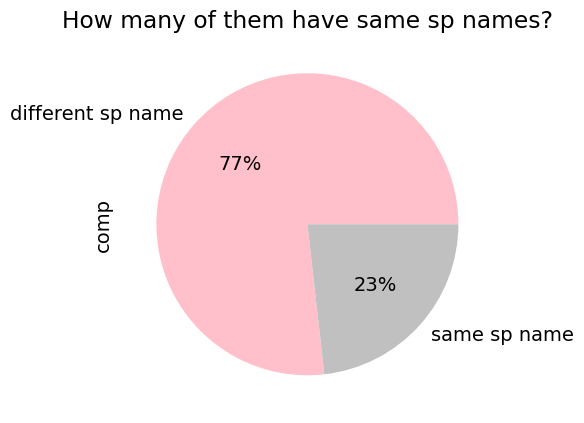

In [27]:
df = gtdbC['comp'].value_counts()
figure(figsize=(5, 5), dpi=100)
df.plot.pie(y='mass', figsize=(5, 5), autopct='%1.0f%%', colors=['pink', 'silver'])
plt.title('How many of them have same sp names?')
plt.tight_layout()
plt.savefig('results/Same_names.png')